## Web scrap for LDA

In [4]:
## import the packages we need 
import requests
from bs4 import BeautifulSoup
import re
## the package to scrape the content of a news page 
from goose3 import Goose  

In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [33]:
def search(n):
    k = []
    for i in range(0,n,10): #10 stands for data till page 1, 20 stands for data till page 2
        url = 'https://www.google.com.mx/search?q=news&hl=en&tbm=nws&ei=mzJ-XvbMMMS1ytMPncGf-Ao&start=0'
        browser = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7' ## shown as web users
        headers = {'User-Agent':browser,}
        new_link = re.sub('start=\d+','start=%s'%i, url, re.S)#collect links from pages we want
        page = requests.get(new_link)
        soup = BeautifulSoup(page.content, "lxml")
        links = soup.findAll("a")  ## try to get the links we want
        l = []  ## the list to store our news links
        for link in  soup.find_all("a",href=re.compile("(?<=/url\?q=)(htt.*://.*)")):
            l.append(re.split(":(?=http)",link["href"].replace("/url?q=",""))[0]) ## to decode the link for each page
        for i in l:
            k.append(i[:i.index('&sa')])
    return(set(k)) #remove duplicate links


In [ ]:
result = search(100) #collect news from latest 4 pages 
count_news = len(result)#the number of list of news
print(count_news)
g = Goose()
all_context = ""
for i in result:
    try:
        article = g.extract(url=i)
        all_context = all_context +article.cleaned_text +"\r\n"
    except:
        all_context = all_context +""
#print(all_context)

108


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
 
# stopword
en_stop =list(stopwords.words("english"))
 
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [10]:
#stopords collection
en_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
en_stop.append('s')

In [12]:
en_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#preparation
doc_set = all_context 
texts = []
 
# clean and tokenize document string
raw = doc_set.lower()
tokens = tokenizer.tokenize(raw)
 
# remove stop words from tokens
stopped_tokens = [i for i in tokens if not i in en_stop]
    
# stem tokens
#stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
# add tokens to list
texts.append(stopped_tokens)

In [14]:
texts

[['wjw',
  'despite',
  'limited',
  'testing',
  'america',
  'passed',
  'every',
  'nation',
  'world',
  'confirmed',
  'coronavirus',
  'cases',
  'according',
  'john',
  'hopkins',
  'university',
  'u',
  '86',
  '000',
  'cases',
  'see',
  'full',
  'map',
  'ohio',
  'department',
  'health',
  'director',
  'amy',
  'acton',
  'believes',
  'virus',
  'peak',
  'happen',
  'first',
  'week',
  'may',
  'new',
  'york',
  '44',
  '635',
  'positive',
  'cases',
  'according',
  'fox',
  '5',
  '519',
  'deaths',
  'ohio',
  'governor',
  'mike',
  'dewine',
  'ohio',
  'lt',
  'governor',
  'jon',
  'husted',
  'u',
  'senator',
  'rob',
  'portman',
  'ohio',
  'department',
  'health',
  'director',
  'amy',
  'acton',
  'mph',
  'brief',
  'public',
  '2',
  'p',
  'state',
  'coronavirus',
  'response',
  'u',
  'death',
  'toll',
  'stands',
  '1',
  '301',
  'number',
  'cases',
  'hit',
  '86',
  '012',
  '2020',
  'two',
  'days',
  'may',
  'conference',
  'victim',

In [29]:
dictionary = corpora.Dictionary(texts)
    
corpus = [dictionary.doc2bow(text) for text in texts]
 
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)

In [16]:
print(dictionary.token2id)

{'0': 0, '00': 1, '000': 2, '006': 3, '01': 4, '012': 5, '028': 6, '03': 7, '04': 8, '060': 9, '06217': 10, '08': 11, '1': 12, '10': 13, '100': 14, '1000': 15, '102': 16, '10208': 17, '10212': 18, '104': 19, '108': 20, '109': 21, '11': 22, '110': 23, '115': 24, '116': 25, '12': 26, '120': 27, '122': 28, '1235': 29, '126': 30, '128': 31, '129': 32, '12th': 33, '13': 34, '130': 35, '132': 36, '138': 37, '14': 38, '140': 39, '148': 40, '15': 41, '150': 42, '153': 43, '155': 44, '157': 45, '16': 46, '160': 47, '162': 48, '165': 49, '17': 50, '170': 51, '173': 52, '18': 53, '180': 54, '186': 55, '19': 56, '190': 57, '1907': 58, '1920s': 59, '1935': 60, '1938': 61, '193rd': 62, '1941': 63, '1951': 64, '1956': 65, '1960': 66, '1960s': 67, '1961': 68, '1967': 69, '1968': 70, '1972': 71, '1973': 72, '1976': 73, '1978': 74, '1979': 75, '1980': 76, '1982': 77, '1991': 78, '1996': 79, '1st': 80, '2': 81, '20': 82, '200': 83, '2001': 84, '2002': 85, '2003': 86, '2006': 87, '2007': 88, '2008': 89, '

In [17]:
print(corpus)

[[(0, 15), (1, 6), (2, 114), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 74), (13, 79), (14, 30), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 45), (23, 5), (24, 3), (25, 1), (26, 39), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 29), (35, 3), (36, 1), (37, 1), (38, 9), (39, 3), (40, 1), (41, 31), (42, 4), (43, 2), (44, 1), (45, 1), (46, 26), (47, 4), (48, 1), (49, 1), (50, 16), (51, 1), (52, 1), (53, 17), (54, 3), (55, 1), (56, 225), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 4), (80, 3), (81, 77), (82, 39), (83, 13), (84, 1), (85, 1), (86, 2), (87, 2), (88, 2), (89, 6), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 2), (97, 3), (98, 3), (99, 2), (100, 6), (101, 13), (102, 25), (103, 12), (104, 4), (105, 2), (106, 1), (107, 20), (108, 

In [31]:
print(ldamodel.print_topics(num_topics=4, num_words=5))

[(0, '0.000*"said" + 0.000*"coronavirus" + 0.000*"students" + 0.000*"health" + 0.000*"new"'), (1, '0.011*"said" + 0.006*"coronavirus" + 0.005*"people" + 0.005*"students" + 0.005*"health"'), (2, '0.000*"said" + 0.000*"coronavirus" + 0.000*"people" + 0.000*"health" + 0.000*"students"'), (3, '0.000*"said" + 0.000*"health" + 0.000*"people" + 0.000*"coronavirus" + 0.000*"university"')]


In [19]:
#pip install wordcloud

In [20]:
from wordcloud import WordCloud

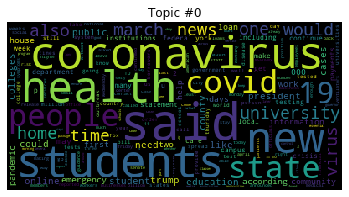

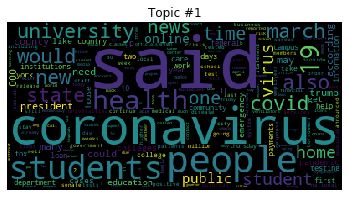

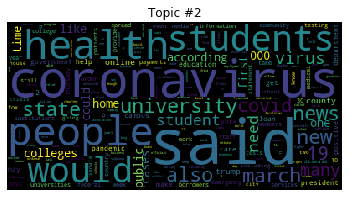

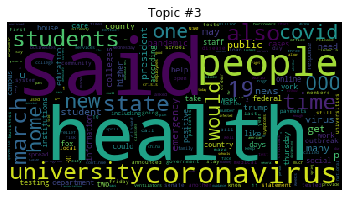

In [32]:
import matplotlib.pyplot as plt
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()